# Notebook 3a: Creating 2D Histograms

Here we show how to create a 2D histogram, how to plot it and how to save it for later plotting. We start with a
2D histogram of the density/magnetic field phase space (note that this low resolution simulation is not converged in magnetic field strength).

In [1]:
import paicos as pa
import numpy as np

# A snapshot object
snap = pa.Snapshot(pa.data_dir, 247, load_catalog=False)

# Create histogram
rhoB = pa.Histogram2D(snap, '0_Density', '0_MagneticFieldStrength', weights='0_Masses', bins_x=200,
                      bins_y=200, logscale=True)

# Create colorlabel
colorlabel = rhoB.get_colorlabel(r'\rho', 'B', 'M')

Attempting to get derived variable: 0_MagneticFieldStrength...	[DONE]



We can check the Histogram2D doc string for details on the options

In [2]:
pa.Histogram2D?

Init signature:
pa.Histogram2D(
    snap,
    x,
    y,
    weights=None,
    bins_x=200,
    bins_y=200,
    normalize=True,
    logscale=True,
)
Docstring:     
This code defines a Histogram2D class which can be used to create 2D
histograms. The class takes in the bin edges for the x and y axes, and an
optional argument to indicate if the histogram should be in log scale. The
class has methods to calculate the bin edges and centers, remove astro
units, and create the histogram with a specific normalization. It also has
a method to generate a color label for the histogram with units.
Init docstring:
Initialize the Histogram2D class with the bin edges for the x
and y axes, and an optional argument to indicate if the
histogram should be in log scale.

Parameters:
    snap (Snapshot): the input snapshot

    x (array): The x data for the histogram

    y (array): The y data for the histogram

    weights (array): The weight data for the histogram, default
                     is None

  

## Plotting the histogram
We are now ready to make a plot.

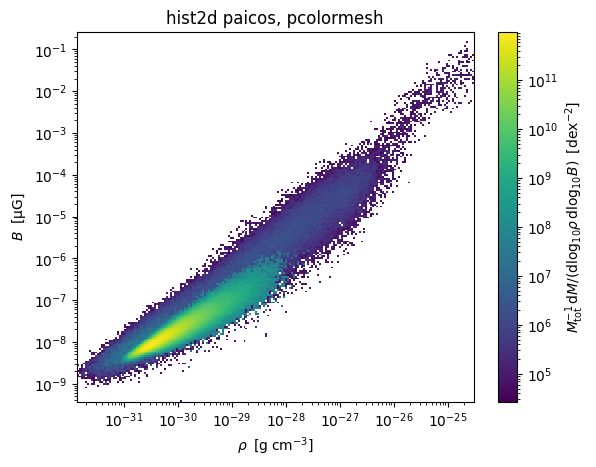

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


# Make a quick plot
plt.figure(1)
plt.clf()

# Convert to physical and some sensible units
xvals = rhoB.centers_x.to_physical.to('g/cm3')  # xvals = rhoB.centers_x would give comoving code units.
yvals = rhoB.centers_y.to_physical.to('uG') # yvals = rhoB.centers_y would give comoving code units.

plt.pcolormesh(xvals.value, yvals.value,
               rhoB.hist2d.value, norm=LogNorm())
plt.xlabel(xvals.label('\\rho'))
plt.ylabel(yvals.label('B'))

plt.title('paicos Histogram2D')
if rhoB.logscale:
    plt.xscale('log')
    plt.yscale('log')
cbar = plt.colorbar()
cbar.set_label(rhoB.colorlabel)
plt.title('hist2d paicos, pcolormesh')
plt.show()

## Density vs temperature histogram
Let's do a density Temperature plot as well

Attempting to get derived variable: 0_Temperatures...
	So we need the variable: 0_MeanMolecularWeight...	[DONE]



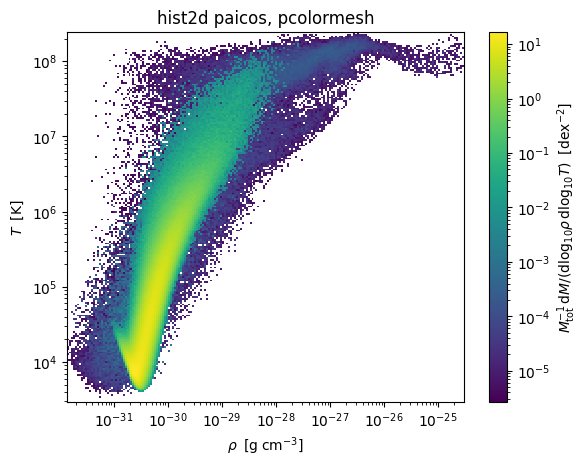

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Create histogram
hist = pa.Histogram2D(snap, '0_Density', '0_Temperatures', weights='0_Masses', bins_x=200,
                      bins_y=200, logscale=True)

# Create colorlabel
colorlabel = hist.get_colorlabel(r'\rho', 'T', 'M')

# Convert to physical and some sensible units
xvals = hist.centers_x.to_physical.to('g/cm3')  # xvals = hist.centers_x would give comoving code units.
yvals = hist.centers_y

# Make a quick plot
plt.figure(1)
plt.clf()

plt.pcolormesh(xvals.value, yvals.value,
               hist.hist2d.value, norm=LogNorm())
plt.xlabel(xvals.label('\\rho'))
plt.ylabel(yvals.label('T'))

plt.title('paicos Histogram2D')
if hist.logscale:
    plt.xscale('log')
    plt.yscale('log')
cbar = plt.colorbar()
cbar.set_label(hist.colorlabel)
plt.title('hist2d paicos, pcolormesh')
plt.show()

## Saving a histogram

Here we save the density/temperature histogram so that we may later plot it (see notebook 3b)

In [5]:
# Save the histogram
hist.save(basedir=pa.data_dir, basename='rhoT_hist')